In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

In [4]:
from google.colab import drive

drive.mount('/content/drive')
file_path = ('/content/drive/My Drive/DatasetML/House Prices.csv')
data = pd.read_csv(file_path)

Mounted at /content/drive


In [5]:
data

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [6]:
# Data Preprocessing
# Handle missing values (fill numerical columns with median)
data.fillna(data.median(numeric_only=True), inplace=True)

# Convert categorical features to dummy variables
data = pd.get_dummies(data, columns=['property_type', 'location', 'city', 'purpose'], drop_first=True)

In [7]:
# Define features and target variable
X = data.drop("price", axis=1)
y = data["price"]
bins = [0, 100000, 200000, 300000, 400000, np.inf]  # Define price ranges
labels = ['Low', 'Medium', 'High', 'Very High', 'Luxury']  # Assign category labels
y_category = pd.cut(y, bins=bins, labels=labels, right=False)

# Now split the data again based on the new categorical target
X_train, X_test, y_train, y_test = train_test_split(X, y_category, test_size=0.2, random_state=42)

In [8]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# --- Model 1: Feedforward Neural Network ---
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(len(labels), activation='softmax')  # Use softmax for classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model, capturing training history
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2) # Added validation_split

# Access training and validation metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Predict and evaluate
nn_predictions = np.argmax(nn_model.predict(X_test), axis=1)
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_predictions))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8855 - loss: 0.3248 - val_accuracy: 0.9552 - val_loss: 0.1213
Epoch 2/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9578 - loss: 0.1099 - val_accuracy: 0.9580 - val_loss: 0.1163
Epoch 3/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.0954 - val_accuracy: 0.9558 - val_loss: 0.1208
Epoch 4/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9652 - loss: 0.0891 - val_accuracy: 0.9604 - val_loss: 0.1117
Epoch 5/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9657 - loss: 0.0858 - val_accuracy: 0.9611 - val_loss: 0.1107
Epoch 6/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9674 - loss: 0.0818 - val_accuracy: 0.9634 - val_loss: 0.1098
Epoch 7/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9677 - loss: 0.0809 - val_accuracy: 0.9595 - val_loss: 0.1150
Epoch 8/50
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9683 - loss: 0.08

In [17]:
print("Neural Network Model Summary:")
nn_model.summary()

Neural Network Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          89,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,305 (1.05 MB)

 Trainable params: 92,101 (359.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184,204 (719.55 KB)

In [11]:
import joblib

joblib.dump(nn_model, 'nn_model.pkl')
nn_model_loaded = joblib.load('nn_model.pkl')

In [12]:
# --- Model 2: Random Forest Regressor ---
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

train_loss = history.history['loss']
val_loss = history.history.get('val_loss', [])  # Use .get() to handle cases without validation data
train_accuracy = history.history['accuracy']
val_accuracy = history.history.get('val_accuracy', [])

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.49      0.52       266
           1       0.96      0.97      0.97      4343
           2       1.00      0.99      0.99     14377
           3       0.74      0.71      0.73       770
           4       0.36      0.39      0.37       144

    accuracy                           0.97     19900
   macro avg       0.72      0.71      0.72     19900
weighted avg       0.97      0.97      0.97     19900



In [20]:
print("Random Forest Model Summary:")
print(f"Number of Trees: {rf_model.n_estimators}")
print(f"Max Depth: {rf_model.max_depth}")
print(f"Number of Features: {X_train.shape[1]}")
print(f"Random State: {rf_model.random_state}")

Random Forest Model Summary:
Number of Trees: 100
Max Depth: None
Number of Features: 1403
Random State: 42


In [13]:
joblib.dump(rf_model, 'rf_model.pkl')
rf_model_loaded = joblib.load('rf_model.pkl')

In [14]:
# --- Model 3: XGBoost Regressor ---
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(labels), random_state=42, n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

train_loss = history.history['loss']
val_loss = history.history.get('val_loss', [])  # Use .get() to handle cases without validation data
train_accuracy = history.history['accuracy']
val_accuracy = history.history.get('val_accuracy', [])

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       266
           1       0.95      0.98      0.97      4343
           2       1.00      1.00      1.00     14377
           3       0.77      0.69      0.72       770
           4       0.36      0.32      0.34       144

    accuracy                           0.97     19900
   macro avg       0.72      0.70      0.71     19900
weighted avg       0.97      0.97      0.97     19900



In [21]:
# Menampilkan parameter model XGBoost
print("XGBoost Model Summary:")
print(f"Objective: {xgb_model.get_params()['objective']}")
print(f"Number of Classes: {xgb_model.get_params()['num_class']}")
print(f"Number of Estimators: {xgb_model.get_params()['n_estimators']}")
print(f"Random State: {xgb_model.get_params()['random_state']}")

XGBoost Model Summary:
Objective: multi:softmax
Number of Classes: 5
Number of Estimators: 100
Random State: 42


In [15]:
joblib.dump(xgb_model, 'xgb_model.pkl')
xgb_model_loaded = joblib.load('xgb_model.pkl')

Neural Network Accuracy: 0.9662
Random Forest Accuracy: 0.9677
XGBoost Accuracy: 0.9684


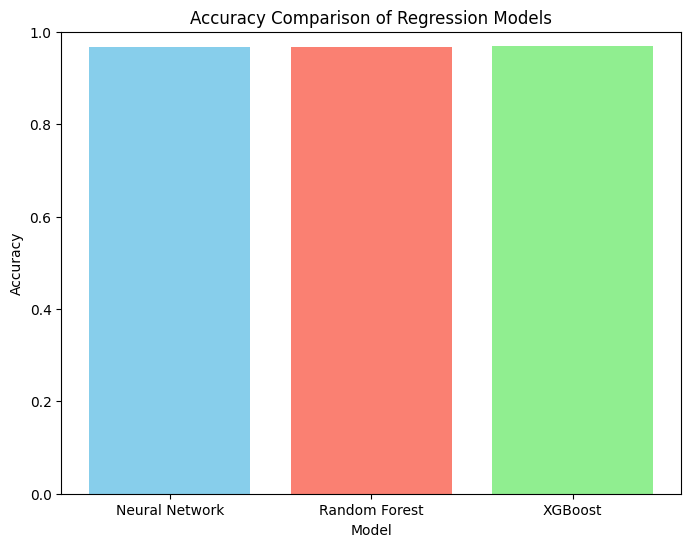

In [16]:
import matplotlib.pyplot as plt
accuracies = {
    'Neural Network': classification_report(y_test, nn_predictions, output_dict=True)['accuracy'],
    'Random Forest': classification_report(y_test, rf_predictions, output_dict=True)['accuracy'],
    'XGBoost': classification_report(y_test, xgb_predictions, output_dict=True)['accuracy']
}

# Print out the accuracies
for model, accuracy in accuracies.items():
    print(f"{model} Accuracy: {accuracy:.4f}")

# Visualisasi Akurasi
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Regression Models')
plt.ylim(0, 1)
plt.show()
